In [376]:
### Loading the data
import pandas as pd
import numpy as np

loan_data_train = pd.read_csv('loan_train.csv')
loan_data_train['isTrain'] = 1
loan_data_test = pd.read_csv('loan_test.csv')
loan_data_test['isTrain'] = 0

print("Shape of train and test are ",loan_data_train.shape , " and " , loan_data_test.shape)

Shape of train and test are  (614, 14)  and  (367, 13)


In [377]:
print(loan_data_test.columns ,"\n", loan_data_train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'isTrain'],
      dtype='object') 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'isTrain'],
      dtype='object')


In [378]:
loan_data = pd.concat([loan_data_train, loan_data_test],sort=False)
loan_data.shape
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'isTrain'],
      dtype='object')

In [379]:
loan_data[loan_data['isTrain']==1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,isTrain
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1


In [380]:
if loan_data.Loan_ID.nunique()!=loan_data.shape[0]:
    print('Duplicate loan Id present')
else:
    print('No Duplicate loan Id present')

No Duplicate loan Id present


In [381]:
print('Test and Trains have different Load_ID''s') if len(np.intersect1d(loan_data_test.Loan_ID.values,loan_data_train.Loan_ID.values))==0 else print('Test and train have duplicate records')
# loan_data_test.Loan_ID.values

Test and Trains have different Load_IDs


In [382]:
loan_data.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
isTrain                0
dtype: int64

In [383]:
# pd.unique(loan_data['Gender'])
loan_data.Gender=loan_data.Gender.fillna('Unknown')
loan_data.Married=loan_data.Married.fillna('Unknown')
loan_data.Dependents=loan_data.Dependents.replace('3+','3').fillna('2')#Considering default dependent count to 2
loan_data.Self_Employed=loan_data.Self_Employed.fillna('No')#considering most ppl applying for loan are salaried.
loan_data.LoanAmount=loan_data.LoanAmount.fillna(loan_data.LoanAmount.mode()[0])#Amount which applied most number of times
loan_data.Loan_Amount_Term=loan_data.Loan_Amount_Term.fillna(loan_data.Loan_Amount_Term.mode()[0])#Term which is applied most number of times
loan_data.Credit_History=loan_data.Credit_History.fillna(0.5)#Consider credit history as 0.5
# loan_data.Loan_Status=loan_data.Loan_Status.fillna('N')

In [375]:
loan_data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [384]:
print(pd.unique(loan_data.Gender))
print(pd.unique(loan_data.Married))
print(pd.unique(loan_data.Dependents))
print(pd.unique(loan_data.Self_Employed))
print(loan_data.LoanAmount.isna().sum())
print(loan_data.Loan_Amount_Term.isna().sum())
print(pd.unique(loan_data.Credit_History))
print(pd.unique(loan_data.Loan_Status))

['Male' 'Female' 'Unknown']
['No' 'Yes' 'Unknown']
['0' '1' '2' '3']
['No' 'Yes']
0
0
[1.  0.  0.5]
['Y' 'N' nan]


In [385]:
loan_data.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [386]:
loan_data.Loan_Status.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [387]:
le.fit_transform(loan_data['Loan_Status'])

TypeError: '<' not supported between instances of 'float' and 'str'

In [389]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan_data['Gender'] = le.fit_transform(loan_data['Gender'])
loan_data['Married'] = le.fit_transform(loan_data['Married'])
loan_data['Education'] = le.fit_transform(loan_data['Education'])
loan_data['Self_Employed'] = le.fit_transform(loan_data['Self_Employed'])
# loan_data['Loan_Status'] = le.fit_transform(loan_data['Loan_Status'])
# encoded_mf

In [325]:
loan_data.Loan_Status.value_counts()

0    559
1    422
Name: Loan_Status, dtype: int64

In [390]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
TPropertyArea=pd.DataFrame(lb.fit_transform(loan_data['Property_Area']) , columns=['Rural','Semiurban','Urban'])

In [391]:
loan_data.index=range(0,TPropertyArea.index.max()+1,1)
loan_data_new = pd.concat([loan_data,TPropertyArea] , axis=1)

In [392]:
loan_data_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,isTrain,Rural,Semiurban,Urban
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,Urban,Y,1,0,0,1
1,LP001003,1,2,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0
2,LP001005,1,2,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0,1
3,LP001006,1,2,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1


In [393]:
loan_data_new.drop(['Property_Area'],inplace=True,axis=1)
loan_data_new.drop(['Loan_ID'],inplace=True,axis=1)

In [394]:
loan_data_new.to_csv('loan_data_new.csv',index=False)

In [395]:
import pandas as pd
import numpy as np

loan_data = pd.read_csv('loan_data_new.csv')

loan_data_train = loan_data[loan_data['isTrain'] == 1]
loan_data_test = loan_data[loan_data['isTrain'] == 0]

In [396]:
loan_data_train.drop(['isTrain'],inplace=True,axis=1)
loan_data_test.drop(['isTrain'],inplace=True,axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [397]:
loan_data_train.Loan_Status.isna().sum()

0

In [404]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan_data_train['Loan_Status'] = le.fit_transform(loan_data_train['Loan_Status'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [333]:
print(loan_data_train.shape)
print(loan_data_test.shape)

(614, 14)
(367, 14)


In [406]:
loan_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 14 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Loan_Status          614 non-null int64
Rural                614 non-null int64
Semiurban            614 non-null int64
Urban                614 non-null int64
dtypes: float64(4), int64(10)
memory usage: 72.0 KB


In [398]:
loan_data_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Rural',
       'Semiurban', 'Urban'],
      dtype='object')

In [407]:
X = loan_data_train.drop(['Loan_Status'],axis=1)
y = loan_data_train['Loan_Status']
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [410]:
X = loan_data_train.drop(['Loan_Status'],axis=1)
y = loan_data_train['Loan_Status']
preds = logreg.predict(X)
predp = logreg.predict_proba(X)

In [411]:
predp

array([[0.2599622 , 0.7400378 ],
       [0.20627898, 0.79372102],
       [0.15922446, 0.84077554],
       ...,
       [0.18887877, 0.81112123],
       [0.17865982, 0.82134018],
       [0.76452062, 0.23547938]])

In [412]:
from sklearn.metrics import accuracy_score , recall_score, precision_score , roc_auc_score
pd.DataFrame(data=[accuracy_score(y, preds), recall_score(y, preds),
                       precision_score(y, preds), roc_auc_score(y, preds)], 
                 index=["accuracy", "recall", "precision", "roc_auc_score"], columns=['Scores'])

,Scores
accuracy,0.791531
recall,0.938389
precision,0.795181
roc_auc_score,0.703569


In [413]:
pd.Series(preds).value_counts()

1    498
0    116
dtype: int64

In [415]:
from sklearn.metrics import confusion_matrix
confusion_matrix(preds,y)

array([[ 90,  26],
       [102, 396]], dtype=int64)

In [416]:
from sklearn.metrics import auc
auc(fpr,tpr)

0.7816202606635072

In [417]:
from sklearn.metrics import precision_recall_curve
prec , recal , thresh = precision_recall_curve(y,predp[:,1])

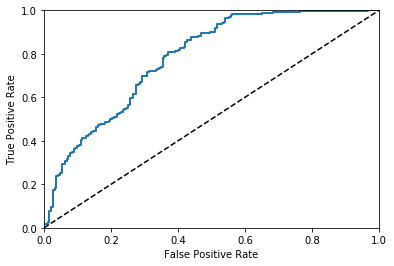

In [421]:
pred = logreg.predict_proba(X)
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y,predp[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [422]:
from sklearn.metrics import accuracy_score , recall_score, precision_score , roc_auc_score
for THRESHOLD in [0.35,0.40,0.45,0.5,0.55,0.6,0.65] :
    
    preds = np.where(logreg.predict_proba(X)[:,1] > THRESHOLD, 1, 0)

    df = pd.DataFrame(data=[accuracy_score(y, preds), recall_score(y, preds),
                       precision_score(y, preds), roc_auc_score(y, preds)], 
                 index=["accuracy", "recall", "precision", "roc_auc_score"], columns=['Scores'+str(THRESHOLD)])
    print(df)

               Scores0.35
accuracy         0.809446
recall           0.981043
precision        0.791587
roc_auc_score    0.706667
               Scores0.4
accuracy        0.804560
recall          0.969194
precision       0.792636
roc_auc_score   0.705951
               Scores0.45
accuracy         0.793160
recall           0.945498
precision        0.793241
roc_auc_score    0.701915
               Scores0.5
accuracy        0.791531
recall          0.938389
precision       0.795181
roc_auc_score   0.703569
               Scores0.55
accuracy         0.788274
recall           0.926540
precision        0.797959
roc_auc_score    0.705458
               Scores0.6
accuracy        0.780130
recall          0.912322
precision       0.797101
roc_auc_score   0.700953
               Scores0.65
accuracy         0.773616
recall           0.879147
precision        0.808279
roc_auc_score    0.710407


In [424]:
from sklearn.model_selection import cross_val_score
score_train= logreg.score(X, y)
score_val = cross_val_score(logreg,X, y, cv=10).mean()
print('training score = %s , while validation score = %s' %(score_train , score_val))

training score = 0.7915309446254072 , while validation score = 0.7881863127764767


In [425]:
from sklearn.metrics import accuracy_score , recall_score, precision_score , roc_auc_score

for THRESHOLD in range(1,100) :
    preds = np.where(logreg.predict_proba(X)[:,1] > THRESHOLD/100, 1, 0)
    df = pd.DataFrame(data=np.array([accuracy_score(y, preds), recall_score(y, preds),
                       precision_score(y, preds), roc_auc_score(y, preds)]).reshape(1,-1), 
                 columns=["accuracy", "recall", "precision", "roc_auc_score"])
    print(df)

   accuracy  recall  precision  roc_auc_score
0  0.687296     1.0   0.687296            0.5
   accuracy  recall  precision  roc_auc_score
0  0.687296     1.0   0.687296            0.5
   accuracy  recall  precision  roc_auc_score
0  0.687296     1.0   0.687296            0.5
   accuracy  recall  precision  roc_auc_score
0  0.687296     1.0   0.687296            0.5
   accuracy  recall  precision  roc_auc_score
0  0.687296     1.0   0.687296            0.5
   accuracy  recall  precision  roc_auc_score
0  0.687296     1.0   0.687296            0.5
   accuracy  recall  precision  roc_auc_score
0  0.687296     1.0   0.687296            0.5
   accuracy  recall  precision  roc_auc_score
0  0.687296     1.0   0.687296            0.5
   accuracy  recall  precision  roc_auc_score
0  0.692182     1.0   0.690671       0.507812
   accuracy  recall  precision  roc_auc_score
0  0.693811     1.0   0.691803       0.510417
   accuracy  recall  precision  roc_auc_score
0   0.69544     1.0   0.692939    

   accuracy    recall  precision  roc_auc_score
0  0.340391  0.047393   0.869565       0.515884
   accuracy    recall  precision  roc_auc_score
0  0.324104  0.016588        1.0       0.508294
   accuracy    recall  precision  roc_auc_score
0  0.319218  0.009479        1.0       0.504739
   accuracy    recall  precision  roc_auc_score
0  0.315961  0.004739        1.0        0.50237
   accuracy  recall  precision  roc_auc_score
0  0.312704     0.0        0.0            0.5
   accuracy  recall  precision  roc_auc_score
0  0.312704     0.0        0.0            0.5
   accuracy  recall  precision  roc_auc_score
0  0.312704     0.0        0.0            0.5
   accuracy  recall  precision  roc_auc_score
0  0.312704     0.0        0.0            0.5
   accuracy  recall  precision  roc_auc_score
0  0.312704     0.0        0.0            0.5
   accuracy  recall  precision  roc_auc_score
0  0.312704     0.0        0.0            0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [362]:
df

,accuracy,recall,precision,roc_auc_score
0,0.312704,0.0,0.0,0.5
